In [1]:
import pandas as pd
from math import exp
from scipy.stats import norm
from scipy import stats
import seaborn as sns
import numpy as np
import datetime as dt

from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

from sklearn.metrics import mean_squared_error
import math

import matplotlib.pyplot as plt
%matplotlib inline

## Data Cleaning

In [2]:
df = pd.read_csv('kc_house_data_train.csv', index_col=0)
df.shape
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,...,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,...,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,...,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,...,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,...,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [3]:
# df['date']=pd.to_datetime(df['date'], {'year': [2014, 2015]})
# df['date'].head()
# df['date']=pd.to_datetime(df['date'],format='%Y%Y%Y%Y,infer_datetime_format=False)
                             
# df['date'].apply(lambda x: x.toordinal())
# def convert_date_to_ordinal(date):
#     return datetime.strptime(date, '%Y-%M').toordinal()
# df.head()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17290 entries, 0 to 17289
Data columns (total 21 columns):
id               17290 non-null int64
date             17290 non-null object
price            17290 non-null float64
bedrooms         17290 non-null int64
bathrooms        17290 non-null float64
sqft_living      17290 non-null int64
sqft_lot         17290 non-null int64
floors           17290 non-null float64
waterfront       17290 non-null int64
view             17290 non-null int64
condition        17290 non-null int64
grade            17290 non-null int64
sqft_above       17290 non-null int64
sqft_basement    17290 non-null int64
yr_built         17290 non-null int64
yr_renovated     17290 non-null int64
zipcode          17290 non-null int64
lat              17290 non-null float64
long             17290 non-null float64
sqft_living15    17290 non-null int64
sqft_lot15       17290 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 2.9+ MB


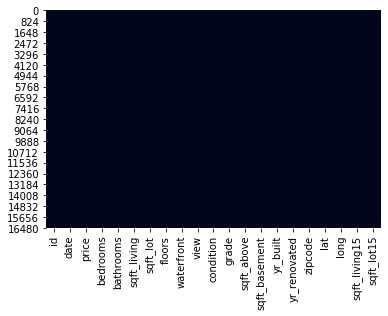

In [5]:
sns.heatmap(df.isnull(), cbar=False)

Bedrooms

In [6]:
# remove homes with >= 10 bedrooms with low bathroom count
df.drop(index=[2356,3680,8597,17114], inplace=True)
df.shape

(17286, 21)

In [7]:
# replace 0 bedrooms with the average, 3
zero_dict = {0:3, 
            np.nan:3}

df['bedrooms'] = df['bedrooms'].replace(zero_dict)

In [8]:
df['bedrooms'].value_counts()

3     7876
4     5488
2     2204
5     1283
6      229
1      160
7       30
8       10
9        5
10       1
Name: bedrooms, dtype: int64

Text(0.5, 1.0, 'Change in House price with sqft')

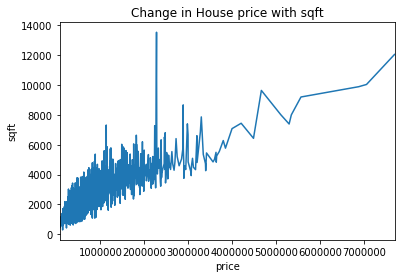

In [9]:
df.groupby('price')['sqft_living'].median().plot()
plt.ylabel('sqft')
plt.title('Change in House price with sqft')

In [10]:
df.loc[df['sqft_living']>12000]
# removed home with >= 12000 bsft and a lower than expected price, $2.3m
df.drop(index=[3275], inplace=True)
df.shape

(17285, 21)

In [11]:
df.loc[df['sqft_living'] >= 10000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6903,9808700762,20140611T000000,7062500.0,5,4.5,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
10366,6762700020,20141013T000000,7700000.0,6,8.0,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800


In [12]:
df.drop(['floors','sqft_lot','long','bathrooms','condition'], axis=1, inplace=True)

## EDA

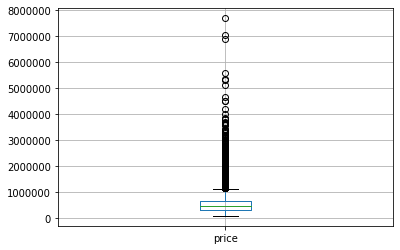

In [13]:
df.boxplot('price')

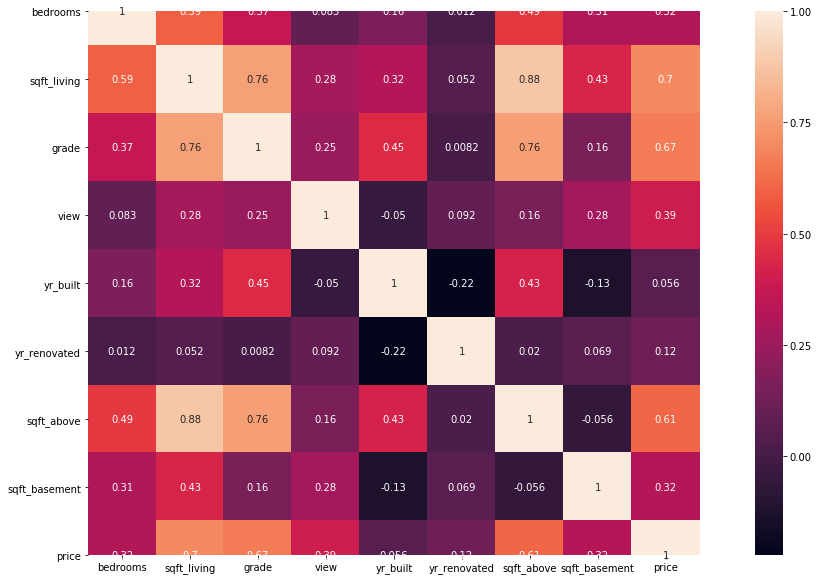

In [14]:
# sns.heatmap(data_pred.corr(), center=0)
corrmat = df[["bedrooms","sqft_living","grade","view","yr_built","yr_renovated","sqft_above","sqft_basement","price"]].corr()
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrmat,square=True,annot=True)

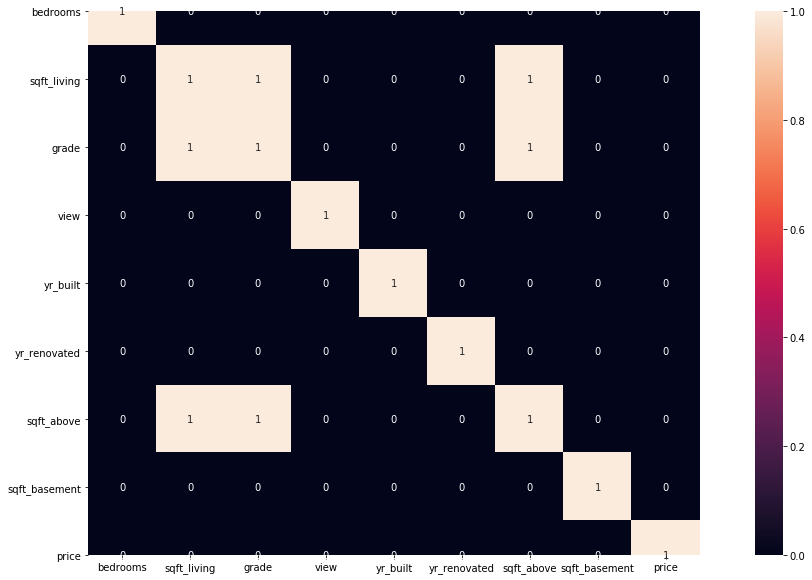

In [15]:
# sns.heatmap(data_pred.corr(), center=0)
corrmat = df[["bedrooms","sqft_living","grade","view","yr_built","yr_renovated","sqft_above","sqft_basement","price"]].corr()>.75
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrmat,square=True,annot=True)

Text(0.5, 1.0, 'Change in House price with sqft')

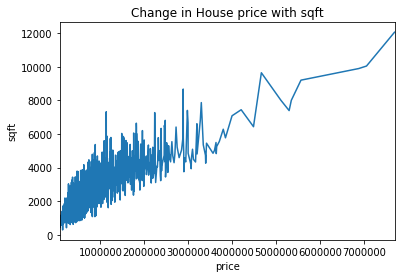

In [16]:
df.groupby('price')['sqft_living'].median().plot()
plt.ylabel('sqft')
plt.title('Change in House price with sqft')

In [17]:
# list of numerical variables
num_vars = [var for var in df.columns if df[var].dtypes != 'O']
print('Number of numerical variables: ', len(num_vars))
# visualise the numerical variables
df[num_vars].head()

Number of numerical variables:  15


,id,price,bedrooms,sqft_living,waterfront,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,sqft_living15,sqft_lot15
0,2591820310,365000.0,4,2070,0,0,8,2070,0,1986,0,98058,47.4388,2390,7700
1,7974200820,865000.0,5,2900,0,0,8,1830,1070,1977,0,98115,47.6784,2370,6283
2,7701450110,1038000.0,4,3770,0,2,11,3770,0,1997,0,98006,47.5646,3710,9685
3,9522300010,1490000.0,3,4560,0,2,12,4560,0,1990,0,98034,47.6995,4050,14226
4,9510861140,711000.0,3,2550,0,0,9,2550,0,2004,0,98052,47.6647,2250,4050


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1934ac88>,
      dtype=object)

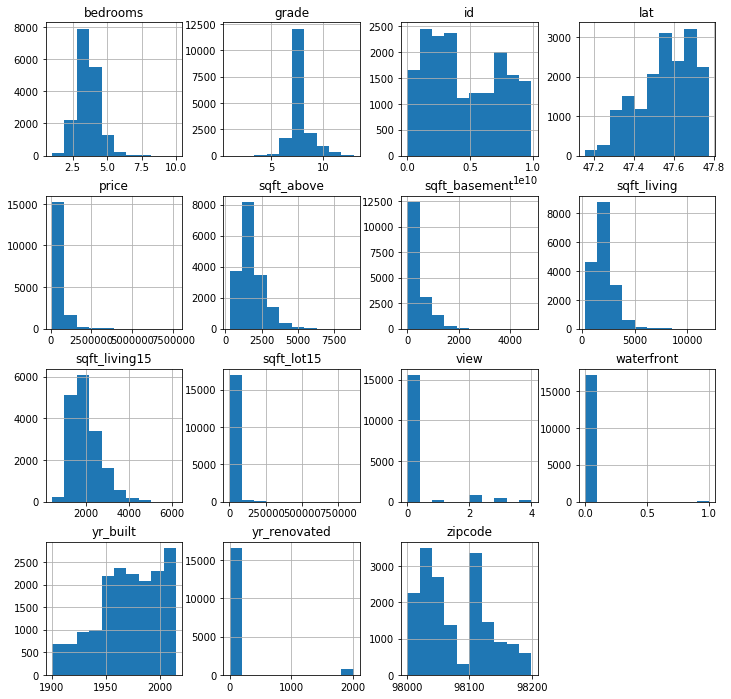

In [18]:
pd.DataFrame.hist(df,figsize=(12,12))

## Feature Engineering

In [19]:
df['year_sold'] = df['date'].apply(lambda x: int(x[:4]))
df['age_house'] = df[['year_sold']].sub(df['yr_built'], axis=0)
df.head()

,id,date,price,bedrooms,sqft_living,waterfront,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,sqft_living15,sqft_lot15,year_sold,age_house
0,2591820310,20141006T000000,365000.0,4,2070,0,0,8,2070,0,1986,0,98058,47.4388,2390,7700,2014,28
1,7974200820,20140821T000000,865000.0,5,2900,0,0,8,1830,1070,1977,0,98115,47.6784,2370,6283,2014,37
2,7701450110,20140815T000000,1038000.0,4,3770,0,2,11,3770,0,1997,0,98006,47.5646,3710,9685,2014,17
3,9522300010,20150331T000000,1490000.0,3,4560,0,2,12,4560,0,1990,0,98034,47.6995,4050,14226,2015,25
4,9510861140,20140714T000000,711000.0,3,2550,0,0,9,2550,0,2004,0,98052,47.6647,2250,4050,2014,10


In [20]:
dt.date(2014,2,1).toordinal()
df['date'][0][:4]
df.head()

,id,date,price,bedrooms,sqft_living,waterfront,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,sqft_living15,sqft_lot15,year_sold,age_house
0,2591820310,20141006T000000,365000.0,4,2070,0,0,8,2070,0,1986,0,98058,47.4388,2390,7700,2014,28
1,7974200820,20140821T000000,865000.0,5,2900,0,0,8,1830,1070,1977,0,98115,47.6784,2370,6283,2014,37
2,7701450110,20140815T000000,1038000.0,4,3770,0,2,11,3770,0,1997,0,98006,47.5646,3710,9685,2014,17
3,9522300010,20150331T000000,1490000.0,3,4560,0,2,12,4560,0,1990,0,98034,47.6995,4050,14226,2015,25
4,9510861140,20140714T000000,711000.0,3,2550,0,0,9,2550,0,2004,0,98052,47.6647,2250,4050,2014,10


In [21]:
df['year_sold'] = df['date'].apply(lambda x: int(x[:4]))
df['age_house'] = df[['year_sold']].sub(df['yr_built'], axis=0)
df['Renovated'] = df['yr_renovated'].apply(lambda x: 0 if x==0 else 1)
df.head()

,id,date,price,bedrooms,sqft_living,waterfront,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,sqft_living15,sqft_lot15,year_sold,age_house,Renovated
0,2591820310,20141006T000000,365000.0,4,2070,0,0,8,2070,0,1986,0,98058,47.4388,2390,7700,2014,28,0
1,7974200820,20140821T000000,865000.0,5,2900,0,0,8,1830,1070,1977,0,98115,47.6784,2370,6283,2014,37,0
2,7701450110,20140815T000000,1038000.0,4,3770,0,2,11,3770,0,1997,0,98006,47.5646,3710,9685,2014,17,0
3,9522300010,20150331T000000,1490000.0,3,4560,0,2,12,4560,0,1990,0,98034,47.6995,4050,14226,2015,25,0
4,9510861140,20140714T000000,711000.0,3,2550,0,0,9,2550,0,2004,0,98052,47.6647,2250,4050,2014,10,0


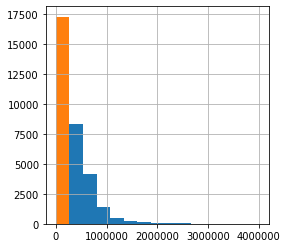

In [22]:
df['price'].hist(bins=15,figsize=(4,4),range=[0,4000000])

df['log_price'] = np.log(df['price'])
df['log_price'].hist(bins=15,figsize=(4,4),range=[0,4000000])

## Feature Selection

In [23]:
lr = LinearRegression(normalize=True)
predictors = ['sqft_living','bedrooms','age_house','Renovated','lat','grade']
X = df[predictors]
y = df['price']
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [24]:
df.price.head()

0     365000.0
1     865000.0
2    1038000.0
3    1490000.0
4     711000.0
Name: price, dtype: float64

In [25]:
y_pred = lr.predict(X)
math.sqrt(mean_squared_error(y, y_pred))
# mean_squared_error(np.e**y, np.e**y_pred)

221718.75949787215

In [26]:
np.e**0.019975901930962214

1.0201767554406531

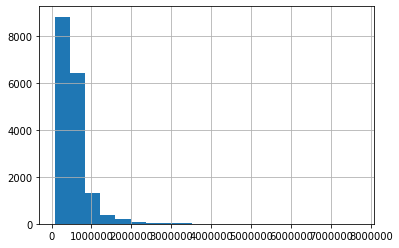

In [27]:
df['price'].hist(bins=20)

In [28]:
df.to_csv('my_file2.csv', index=False)

In [29]:
# scaler = StandardScaler()

# subsetscale = []
# for var in subset:
#     new_col = var+"_scaled"
#     df[]

In [30]:
# pd.read_csv('my_file2.csv')

In [31]:
# df = pd.get_dummies(df,columns=['zipcode'])
# df.columns

## Modeling

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13828, 6), (3457, 6), (13828,), (3457,))

In [33]:
from statsmodels.formula.api import ols
mlr_model=ols('price~sqft_living+bedrooms+age_house+Renovated+lat+grade', data=df).fit()
mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     5276.
Date:                Sun, 23 Feb 2020   Prob (F-statistic):               0.00
Time:                        15:03:02   Log-Likelihood:            -2.3729e+05
No. Observations:               17285   AIC:                         4.746e+05
Df Residuals:                   17278   BIC:                         4.746e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -2.596e+07   5.97e+05    -43.498      0.000   -2.71e+07   -2.48e+07
sqft_living   223.9032      3.353     66.777      0.000     217.331     230.475
bedrooms    -4.386e+04   2352.060    -18.649      0.000   -4.85e+04   -3.93e+04
age_house    2942.0694     68.226     43.122      0.000    2808.339    3075.800
Renovated    5.755e+04   8720.727      6.599      0.000    4.05e+04    7.46e+04
lat           5.29e+05   1.26e+04     41.927      0.000    5.04e+05    5.54e+05
grade        1.162e+05   2435.324     47.719      0.000    1.11e+05    1.21e+05
==============================================================================
Omnibus:                    15669.599   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1504453.695
Skew:                           3.997   Prob(JB):                         0.00
Kurtosis:                      48.000   Cond. No.                     8.05e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.05e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Separate dataset into train and test

In [34]:
df2 = pd.read_csv('kc_house_data_test_features.csv',  index_col=0)
df2.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1974300020,20140827T000000,4,2.50,2270,11500,1.0,0,0,3,8,1540,730,1967,0,98034,47.7089,-122.241,2020,10918
1,1974300020,20150218T000000,4,2.50,2270,11500,1.0,0,0,3,8,1540,730,1967,0,98034,47.7089,-122.241,2020,10918
2,3630020380,20141107T000000,3,2.50,1470,1779,2.0,0,0,3,8,1160,310,2005,0,98029,47.5472,-121.998,1470,1576
3,1771000290,20141203T000000,3,1.75,1280,16200,1.0,0,0,3,8,1030,250,1976,0,98077,47.7427,-122.071,1160,10565
4,5126310470,20150115T000000,4,2.75,2830,8126,2.0,0,0,3,8,2830,0,2005,0,98059,47.4863,-122.140,2830,7916


In [35]:
df2.drop(['floors','sqft_lot','long','bathrooms','condition'], axis=1, inplace=True)
df2['year_sold'] = df2['date'].apply(lambda x: int(x[:4]))
df2['age_house'] = df2[['year_sold']].sub(df2['yr_built'], axis=0)
df2['Renovated'] = df2['yr_renovated'].apply(lambda x: 0 if x==0 else 1)
df2.head()

,id,date,bedrooms,sqft_living,waterfront,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,sqft_living15,sqft_lot15,year_sold,age_house,Renovated
0,1974300020,20140827T000000,4,2270,0,0,8,1540,730,1967,0,98034,47.7089,2020,10918,2014,47,0
1,1974300020,20150218T000000,4,2270,0,0,8,1540,730,1967,0,98034,47.7089,2020,10918,2015,48,0
2,3630020380,20141107T000000,3,1470,0,0,8,1160,310,2005,0,98029,47.5472,1470,1576,2014,9,0
3,1771000290,20141203T000000,3,1280,0,0,8,1030,250,1976,0,98077,47.7427,1160,10565,2014,38,0
4,5126310470,20150115T000000,4,2830,0,0,8,2830,0,2005,0,98059,47.4863,2830,7916,2015,10,0


In [36]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'sqft_living', 'waterfront', 'view',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'sqft_living15', 'sqft_lot15', 'year_sold',
       'age_house', 'Renovated', 'log_price'],
      dtype='object')

In [37]:
from sklearn.linear_model import Lasso, Ridge, LinearRegression

ridge_15=Ridge(alpha=15)
ridge_15.fit(X_train ,y_train)

Ridge(alpha=15, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [38]:
pd.DataFrame(y_train).shape

(13828, 1)

In [39]:
print(ridge_15.predict(X_train))
print(ridge_15.predict(X_test))
results = ridge_15.predict(X_test)

[ 512415.35527977  567297.23715765  630003.39556331 ...  340494.65146111
  516390.47110226 1559672.20681548]
[1794197.74084817  487076.22679009  202612.75530966 ...  819821.59968433
  110859.18970232  397409.73398989]


In [40]:
import pickle

with open('Meagan_Pickle.pickle','wb') as f:
    pickle.dump(ridge_15, f)